In [76]:
#Importing the libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df=pd.read_csv("C:\\Users\\ankit\Desktop\\Praxis\\Time Series\\salesdata.csv")
df.head()

,Date,Sales,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,01-01-2007,4600,NaN,NaN,=
1,02-01-2007,5700,NaN,NaN,NaN
2,03-01-2007,6800,NaN,NaN,NaN
3,04-01-2007,7900,NaN,NaN,NaN
4,05-01-2007,9000,NaN,NaN,NaN


In [69]:
df.size

600

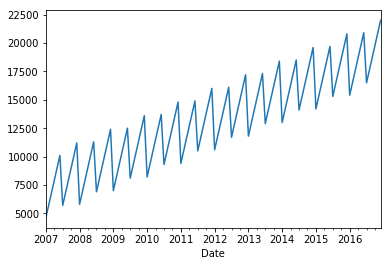

In [3]:
#plot the graph to check trend and seasonality
df.index=pd.to_datetime(df['Date'])
df['Sales'].plot()
plt.show()

C:\Users\ankit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


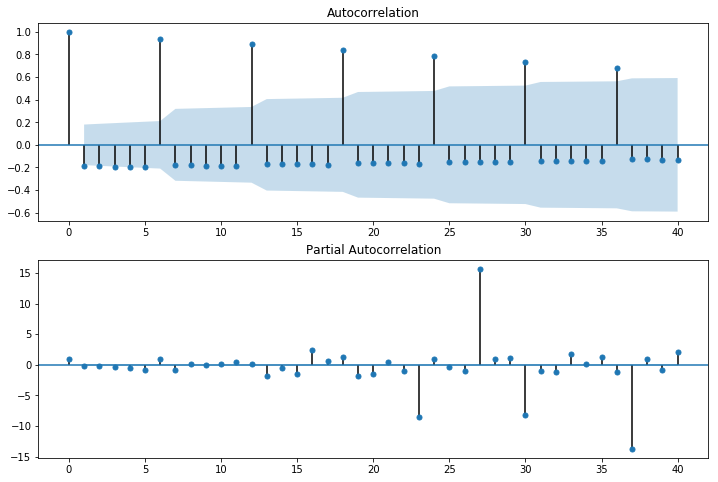

In [4]:
#Plot ACF and PACF to cal p,q
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [5]:
#Train-test split
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.2)
train.size


480

In [6]:
test.size

120

In [18]:
#fitting the model 
model=sm.tsa.statespace.SARIMAX(endog=train['Sales'],order=(6,1,4),seasonal_order=(1,1,0,6),trend='c',enforce_invertibility=False)
results=model2.fit()
print(results.summary())

C:\Users\ankit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\ankit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                             Sales   No. Observations:                   96
Model:             SARIMAX(6, 1, 4)x(1, 1, 0, 6)   Log Likelihood                -882.430
Date:                           Tue, 14 Jan 2020   AIC                           1790.860
Time:                                   20:37:05   BIC                           1823.212
Sample:                                        0   HQIC                          1803.900
                                            - 96                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    165.1613    797.244      0.207      0.836   -1397.408    1727.730
ar.L1         -1.7877      0.219     -8.151

In [77]:
df_forecast=results.forecast(steps=30)
df_forecast.head()


C:\Users\ankit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


96     18572.574218
97     17047.734622
98     13774.592629
99     20882.721601
100    17707.579655
dtype: float64

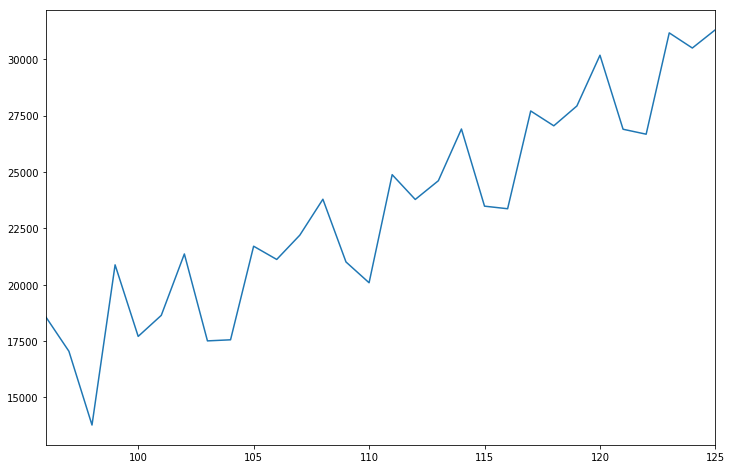

In [75]:
# forecast the model
#df_x=pd.DataFrame(df_forecast)
#df_x.sort_values(by='Date', inplace=True)
#df_x
df_forecast.plot(figsize=(12,8))
plt.show()

In [21]:
test.drop(['Date'],axis=1,inplace=True)

C:\Users\ankit\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
test.sort_values(by='Date', inplace=True)

C:\Users\ankit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
test.head()

,Sales,Unnamed: 2,Unnamed: 3,Unnamed: 4
Date,,,,
2008-01-01,5800,NaN,NaN,NaN
2008-02-01,6900,NaN,NaN,NaN
2009-09-01,10300,NaN,NaN,NaN
2009-11-01,12500,NaN,NaN,NaN
2010-07-01,9300,NaN,NaN,NaN
